# Data Science Challenge

# Path files 
>(Put your paths here)

In [15]:
path_booking = '/home/dsc/data/challenge/DS_Challenge/bookings.csv.bz2'     # Put your path in the string

In [1]:
path_searches = '/home/dsc/data/challenge/DS_Challenge/searches.csv.bz2'       # Put your path in the string

# Exercise 1

> Count the number of the lines from the files

### Modules and libraries needed

* bz2, for loading data directly from compressed file

In [12]:
# Data wrangling
import numpy as np
import pandas as pd

# Performance
import time
from tqdm import tqdm

In [14]:
# vemos donde estamos
!pwd

/home/dsc/data/challenge/DS_Challenge


In [13]:
# que contiene la ruta (archivos, textos, etc)
!ls

bookings.csv.bz2  DS_Challenge_01.ipynb  README.md
_data		  ds_exercises		 searches.csv.bz2


Count the lines with the function `open`

In [19]:
%%time

with open(path_booking, mode='r', errors='ignore') as b:
    k = 0
    for line in b.readlines():
        k += 1
        
print(f'Bookings has {k} lines.')

Bookings has 3686282 lines.
CPU times: user 5.13 s, sys: 1.08 s, total: 6.22 s
Wall time: 6.27 s


In [20]:
%%time

with open(path_searches, mode='r', errors='ignore') as b:
    k = 0
    for line in b.readlines():
        k += 1
        

print(f'Searches has {k} lines.')

Searches has 3832185 lines.
CPU times: user 6.02 s, sys: 335 ms, total: 6.35 s
Wall time: 6.39 s


Count the lines with the module `bz2`

In [23]:
# Importamos el módulo "bz2 Files"

import bz2

In [ ]:
%%time
# for loop searches file
with bz2.BZ2File(path_searches, mode='r') as bz2file:
    k = 0
    for line in bz2file.readlines():
        k += 1
        
print(f'Searches {k} lines.')

### <strong>SHELL</strong>

With the command `bz2cat` we can "Get-Content" from the file and read it

We will use `tqdm` to see the progress bar and typed with `--bytes` to look in human the file size

>Rememeber in shell you need to stay on the path where you have the folders to execute this code

#### Linux
Using `bzcat`


In [ ]:
%bzcat 'bookings.csv.bz2' | tqdm --bytes | wc -l

UsageError: Line magic function `%bzcat` not found.


#### Windows

With PowerShell `Get-Content` "Name of the file" | Measure-Object -Line

In [ ]:
%Get-Content 'bookings.csv.bz2' | Measure-Object -Line

# Exercise 2

**Top 10 arrival airports in the world in 2013 (using the bookings file)**

- To get the total number of passengers for an airport, you can sum the column `pax`, grouping by `arr_port`. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).
- Print the top 10 arrival airports in the standard output, including the number of passengers.
- **Bonus point**: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at **GeoBases in Github**)
- **Bonus point**: Solve this problem using pandas (instead of any other approach)

The plan is:
1. Tear the dataset down to smaller pieces.
   >doing with chunks
2. Perform aggregation operations on the small piece.
   >using agg function
3. Save it for later to combine all the smaller pieces.
   >Concatenating the chunks
4. Aggregate again but with the smaller pieces or chunks of data.

We will use the `chunk` parameter of the `pd.read_csv` function.

In [ ]:
def nan2zero(num):
  try:
    return int(num)
  except:
    return 0

In [ ]:
# cols_of_interest = [12, 34, 35]

bookings = []

df_iterator = pd.read_csv(path_booking,
    compression="bz2",
    sep="^",
    usecols = lambda x: x.strip() in ['arr_port', 'pax', 'year'], # Usamos esto pero con los indices parece que vuelven las columnas ok.
    converters= {
        'arr_port': str.strip,
        'pax': nan2zero     # Function to clean NA values in pax
    },
    chunksize=1e5,      # The number of nrows for chunk
    nrows=1e6      # Limit the number of rows -> Toy problem
)

for i, data_chunk in enumerate(df_iterator):
    print(("Chunk: %d, size of chunk %d"%(i+1, len(data_chunk))))           # Only for have some information about the chunks
    data_chunk_2013 = data_chunk[data_chunk['year']==2013]                  # Filter by year 2013
    chunk_result = data_chunk_2013.groupby(by=['arr_port','year']).sum()[['pax']]       # Group by arr_port + year and sum the passengers
    bookings.append(chunk_result)                                           # Appending the chunks into the empty list we create at the begining of this code cell
    
total_bookings = pd.concat(bookings).groupby('arr_port').sum()[['pax']]     # We need to regroup by airports and sum passengers for chunks do it later
top_10 = total_bookings.sort_values(by='pax', ascending=False).head(10)     # Sorting the values by the number of passengers in descending order

top_10


Chunk: 1, size of chunk 100000
Chunk: 2, size of chunk 100000
Chunk: 3, size of chunk 100000
Chunk: 4, size of chunk 100000
Chunk: 5, size of chunk 100000
Chunk: 6, size of chunk 100000
Chunk: 7, size of chunk 100000
Chunk: 8, size of chunk 100000
Chunk: 9, size of chunk 100000
Chunk: 10, size of chunk 100000


,pax
arr_port,
LHR,8881
MCO,7093
LAX,7053
LAS,6963
JFK,6627
CDG,6449
BKK,5946
MIA,5815
SFO,5800


### With all the data

In [ ]:
df_iterator = pd.read_csv(path_booking,
    compression="bz2",
    sep="^",
    usecols = lambda x: x.strip() in ['arr_port', 'pax', 'year'], # Usamos esto pero con los indices parece que vuelven las columnas ok.
    converters= {
        'arr_port': str.strip,
        'pax': nan2zero     # Function to clean NA values in pax
    },
    chunksize=1e6,      # The number of nrows for chunk
)

bookings = []

for i, data_chunk in enumerate(df_iterator):
    print(("Chunk: %d, size of chunk %d"%(i+1, len(data_chunk))))           # Only for have some information about the chunks
    data_chunk_2013 = data_chunk[data_chunk['year']==2013]                  # Filter by year 2013
    chunk_result = data_chunk_2013.groupby(by=['arr_port','year']).sum()[['pax']]       # Group by arr_port + year and sum the passengers
    bookings.append(chunk_result)                                           # Appending the chunks into the empty list we create at the begining of this code cell
    
total_bookings = pd.concat(bookings).groupby('arr_port').sum()[['pax']]     # We need to regroup by airports and sum passengers for chunks do it later
top_10 = total_bookings.sort_values(by='pax', ascending=False).head(10)     # Sorting the values by the number of passengers in descending order

top_10

Chunk: 1, size of chunk 1000000
Chunk: 2, size of chunk 1000000
Chunk: 3, size of chunk 1000000
Chunk: 4, size of chunk 1000000
Chunk: 5, size of chunk 1000000
Chunk: 6, size of chunk 1000000
Chunk: 7, size of chunk 1000000
Chunk: 8, size of chunk 1000000
Chunk: 9, size of chunk 1000000
Chunk: 10, size of chunk 1000000
Chunk: 11, size of chunk 10


,pax
arr_port,
LHR,88809
MCO,70930
LAX,70530
LAS,69630
JFK,66270
CDG,64490
BKK,59460
MIA,58150
SFO,58000


**Bonus point**: 

Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github)

In [ ]:
from neobase import NeoBase

# for interactivity
from ipywidgets import interact

In [ ]:
b = NeoBase()
b

In [ ]:
# @interact

b.get('LHR','city_name_list')

['London']

In [ ]:
data_bookings = pd.read_csv(path_booking,
    compression="bz2",
    sep="^",
    usecols = lambda x: x.strip() in ['arr_port', 'pax', 'year'], # Usamos esto pero con los indices parece que vuelven las columnas ok.
    converters= {
        'arr_port': str.strip,
        'pax': nan2zero     # Function to clean NA values in pax
    })

In [ ]:
from neobase import NeoBase

def name_city(code_iata):
    b = NeoBase()
    name = b.get(code_iata,'city_name_list')
    return name

In [ ]:
name_city('MDR')

['Maasai Mara Game Reserve']

In [ ]:
print(name_city("BCN"))
print(name_city("ITA"))
print(name_city("RNM"))
print(name_city("MAD"))
print(name_city("SCG"))

['Barcelona']
['Itacoatiara']
['Qarn Alam']
['Madrid']
['Spring Creek Airport']


In [ ]:
top_10.index

Index(['LHR', 'MCO', 'LAX', 'LAS', 'JFK', 'CDG', 'BKK', 'MIA', 'SFO', 'DXB'], dtype='object', name='arr_port')

In [ ]:
b.get(top_10.index[0])

{'__dup__': set(),
 'iata_code': 'LHR',
 'name': 'London Heathrow Airport',
 'lat': '51.4775',
 'lng': '-0.461389',
 'page_rank': 0.6542080087816798,
 'country_code': 'GB',
 'country_name': 'United Kingdom',
 'continent_name': 'Europe',
 'timezone': 'Europe/London',
 'city_code_list': ['LON'],
 'city_name_list': ['London'],
 'location_type': ['A'],
 'currency': 'GBP'}

In [ ]:
b.get(top_10.index[0])['name']

'London Heathrow Airport'

In [ ]:
b = NeoBase()
top_10['arr_port_name'] = top_10.index.map(lambda x: b.get(x, 'name'))
top_10['city'] = top_10.index.map(lambda x: b.get(x, 'city_name_list')[0])
top_10['country'] = top_10.index.map(lambda x: b.get(x, 'country_name'))
top_10['currency'] = top_10.index.map(lambda x: b.get(x, 'currency'))
top_10

,pax,arr_port_name,city,country,currency
arr_port,,,,,
LHR,88809,London Heathrow Airport,London,United Kingdom,GBP
MCO,70930,Orlando International Airport,Orlando,United States,USD
LAX,70530,Los Angeles International Airport,Los Angeles,United States,USD
LAS,69630,McCarran International Airport,Las Vegas,United States,USD
JFK,66270,John F. Kennedy International Airport,New York City,United States,USD
CDG,64490,Paris Charles de Gaulle Airport,Paris,France,EUR
BKK,59460,Suvarnabhumi Airport,Bangkok,Thailand,THB
MIA,58150,Miami International Airport,Miami,United States,USD
SFO,58000,San Francisco International Airport,San Francisco,United States,USD


In [ ]:
top_10.to_csv('Exercise_2.csv', sep = '^', index = False)

# Exercise 3

**Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona**

- For the arriving airport, you can use the Destination column in the searches file. 
- Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.
- **Bonus point**: Solving this problem using pandas (instead of any other approach)

## Modules and libraries

In [ ]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
#pd.options.display.max_rows = 100

In [ ]:
def data_preprocessing(df): 
    '''

    '''

    df['Date'] = df['Date'].str.strip().str[:7]         # Slicing the date
    
    df['Destination'] = df['Destination'].str.strip().str.upper()   # Cleaning the values of Destination (iata_codes must be len=3)
    df.dropna(inplace=True)                                         # Cleaning de Na values

In [ ]:
def data_plot(path: str):
    
    searches_iterator = pd.read_csv(path,
                        sep='^',
                        chunksize=1e6,
                        #    nrows=1e6,
                        compression='bz2',
                        usecols=['Date','Destination'])

    searches =[]
    
    for i, chunk in enumerate(searches_iterator):
        # print(("Chunk: %d, size of chunk %d"%(i+1, len(chunk))))           # Only for have some information about the chunks
        chunk['Year_Month'] = chunk['Date'].str[:7]                        # Extract the year and month slicing the chunks
        data_chunk = chunk[chunk['Destination'].isin(["MAD", "BCN", "AGP"])]    # Filter the destination airports we want to plot
        data_chunk['Searches'] = 1
        chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before
        searches.append(chunk_group)
        
    total_searches = pd.concat(searches)                                    # Concat all the chunks
    total_searches = total_searches.groupby(['Year_Month', 'Destination']).sum()[['Searches']]
    
    fig, ax = plt.subplots(figsize=(15,8))

    plot = sns.lineplot(data=total_searches, x='Year_Month', y='Searches', hue='Destination')
    plt.title("Searches by Airport Destination ");
    return plot

C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16072\3168168681.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chunk['Searches'] = 1
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16072\3168168681.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_group = data_chunk.groupby(['Year_Month','Destination']).sum()[['Searches']]  # Group the data_chunk and sum the column that we create before
C:\Users\Pablo Villar\AppData\Local\Temp\ipykernel_16072\3168168681.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

<AxesSubplot: title={'center': 'Searches by Airport Destination '}, xlabel='Year_Month', ylabel='Searches'>

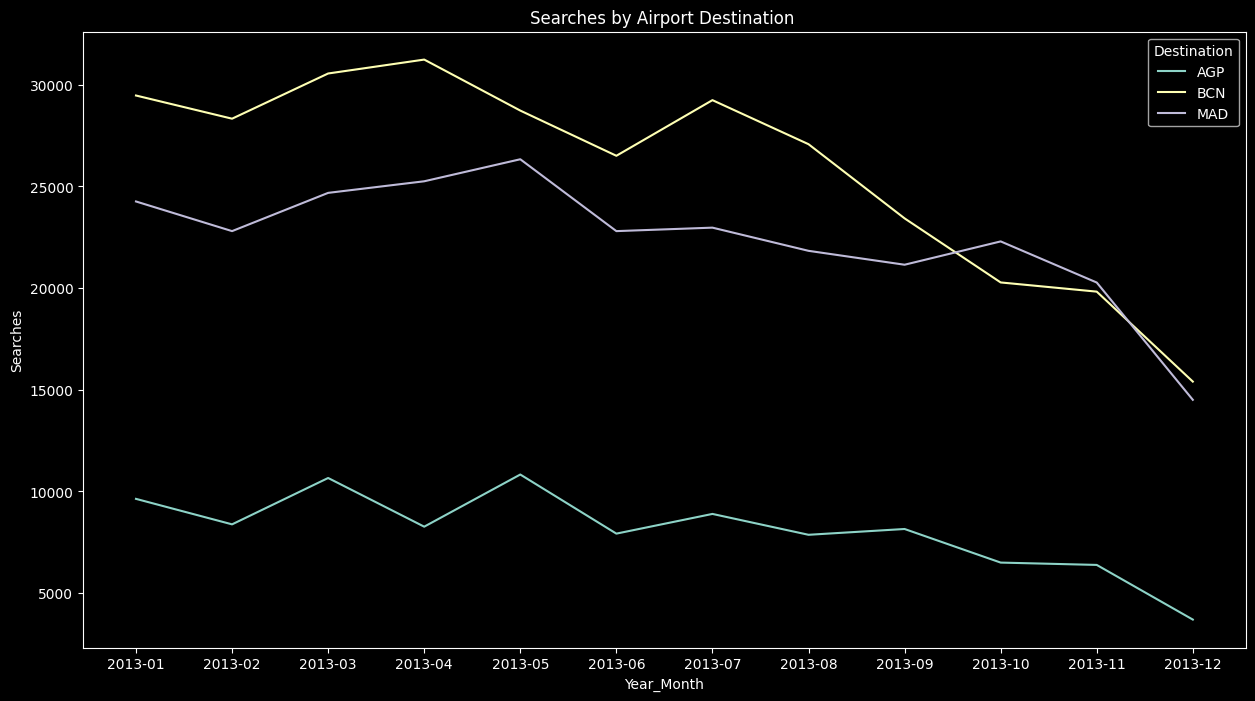

In [ ]:
data_plot(path_searches)

# Exercise 4

**Match searches with bookings**

- For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match.
- For the bookings file, origin and destination are the columns `dep_port` and `arr_port`, respectively.
- Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.

### Modules and libraries

In [ ]:
import numpy as np
import pandas as pd

Reading the data with chunks

**SEARCHES**
<hr>

In [ ]:
%%time

interest_columns_searches = [0, 5, 6, 11]

data_iterator = pd.read_csv(path_searches, 
                            chunksize=2e6,
                            # nrows=2e6,              # To run the function with sample data
                            sep='^', 
                            compression='bz2', 
                            low_memory=False,         # set low_memory = False means when the file is larger, read_csv loads the file in chunks. If an entire chunk has all numeric values, read_csv will save it as numeric. If it encounters some non-numeric values in a chunk, then it will save the values in that chunk as non-numeric (object).
                            usecols=interest_columns_searches,
                            dtype=str)

# Create a dataframe where we go to append the chunks
searches = pd.DataFrame()

for i, data_chunk in enumerate(data_iterator):
    searches = searches.append(data_chunk)
    searches.drop_duplicates(inplace=True)                              # Drop duplicates cost a lot of time
    searches.to_csv(path_searches_no_dup, sep='^', index=False)         # Save the data in a new csv
    print('Chunk: %d, size of chunk %d' %(i+1, searches.shape[0]))
    print("="*66)       # Separator

<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 1, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 2, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 3, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 4, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 5, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 6, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 7, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 8, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 9, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 10, size of chunk 358333


<timed exec>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 11, size of chunk 358334
CPU times: total: 33.8 s
Wall time: 1min 37s


In [ ]:
searches.isna().sum()

Date              0
Origin            1
Destination       1
Seg1Date       1026
dtype: int64

In [ ]:
wrong_len_searches_des = searches['Destination'].str.len() < 3
wrong_len_searches_des.sort_values(ascending=False)

20390197     True
239330      False
239338      False
239337      False
239336      False
            ...  
119644      False
119643      False
119642      False
119641      False
179496      False
Name: Destination, Length: 358334, dtype: bool

In [ ]:
# Wrong lenght in the departure airport code in the searches file

wrong_len_s_dep = searches["Origin"].str.len() < 3
wrong_len_s_dep.sort_values(ascending= False)

0           False
239330      False
239338      False
239337      False
239336      False
            ...  
119644      False
119643      False
119642      False
119641      False
20390197    False
Name: Origin, Length: 358334, dtype: bool

In [ ]:
searches['Destination'][20390197]

'HA'

In [ ]:
searches = searches.drop([20390197])

In [ ]:
np.count_nonzero(wrong_len_s_dep)

0

**BOOKINGS**
<hr>

In [ ]:
%%time

interest_columns_bookings = [6,9,12,32]             # Taking the index of the columns and don't clean the blank spaces

data_iterator = pd.read_csv(path_bookings,
                            chunksize = 2e6,
                            sep = '^',
                            compression = 'bz2',
                            # nrows = 2e6,
                            usecols = interest_columns_bookings,
                            low_memory=True, 
                            dtype=str)

bookings = pd.DataFrame()

for i, data_chunk in enumerate(data_iterator):
    #data_chunk = bookings_data_preprocessing(data_chunk)
    #data_chunk.reset_index(inplace=True)
    data_chunk['Booked'] = 1               # Create the column of values for bookings
    bookings = bookings.append(data_chunk)
    bookings.drop_duplicates(inplace=True)
    print("Chunk: %d, size of chunk %d" %(i+1, bookings.shape[0]))
    print("="*66)

<timed exec>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 1, size of chunk 708879


<timed exec>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 2, size of chunk 708879


<timed exec>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 3, size of chunk 708882


<timed exec>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 4, size of chunk 708882


<timed exec>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 5, size of chunk 708882


<timed exec>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Chunk: 6, size of chunk 708882
CPU times: total: 19.3 s
Wall time: 1min 31s


In [ ]:
bookings['dep_port'] = bookings['dep_port'].str.strip().str.upper()
bookings['arr_port'] = bookings['arr_port'].str.strip().str.upper()

In [ ]:
wrong_len_b_arr = bookings["arr_port"].str.len() < 3
wrong_len_b_arr.sort_values(ascending=False)

5000007     True
0          False
666630     False
666622     False
666623     False
           ...  
334139     False
334140     False
334141     False
334142     False
5000008    False
Name: arr_port, Length: 708882, dtype: bool

In [ ]:
wrong_len_b_dep = bookings["dep_port"].str.len() < 3
wrong_len_b_dep.sort_values(ascending=False)

5000007     True
0          False
666630     False
666622     False
666623     False
           ...  
334139     False
334140     False
334141     False
334142     False
5000008    False
Name: dep_port, Length: 708882, dtype: bool

In [ ]:
# Drop the Na values with the index

bookings = bookings.drop([5000007])

In [ ]:
wrong_len_b_arr = bookings["arr_port"].str.len() < 3
wrong_len_b_arr.sort_values(ascending=False)

0          False
666630     False
666622     False
666623     False
666624     False
           ...  
334139     False
334140     False
334141     False
334142     False
5000008    False
Name: arr_port, Length: 708881, dtype: bool

In [ ]:
np.count_nonzero(wrong_len_b_arr)   # Counts the number of non-zero values in the array

0

In [ ]:
searches.isna().sum()

Date              0
Origin            1
Destination       1
Seg1Date       1026
dtype: int64

In [ ]:
wrong_len_searches_des = searches['Destination'].str.len() < 3
wrong_len_searches_des.sort_values(ascending=False)

20390197     True
239330      False
239338      False
239337      False
239336      False
            ...  
119644      False
119643      False
119642      False
119641      False
179496      False
Name: Destination, Length: 358334, dtype: bool

In [ ]:
# Wrong lenght in the departure airport code in the searches file

wrong_len_s_dep = searches["Origin"].str.len() < 3
wrong_len_s_dep.sort_values(ascending= False)

0           False
239330      False
239338      False
239337      False
239336      False
            ...  
119644      False
119643      False
119642      False
119641      False
20390197    False
Name: Origin, Length: 358334, dtype: bool

In [ ]:
searches['Destination'][20390197]

'HA'

In [ ]:
searches = searches.drop([20390197])

In [ ]:
np.count_nonzero(wrong_len_s_dep)

0

Bookings columns

In [ ]:
bookings.columns = bookings.columns.str.strip()

In [ ]:
bookings.columns

Index(['cre_date', 'dep_port', 'arr_port', 'brd_time', 'Booked'], dtype='object')

Dates

In [ ]:
searches["Date"] = searches["Date"].str[0:10]
searches["Seg1Date"] = searches["Seg1Date"].str[0:10]
bookings["brd_time"] = bookings["brd_time"].str[0:10]
bookings["cre_date"] = bookings["cre_date"].str[0:10]

In [ ]:
bookings.head()

,cre_date,dep_port,arr_port,brd_time,Booked
0,2013-02-22,ZRH,LHR,2013-03-07,1
1,2013-03-26,SAL,CLT,2013-04-12,1
2,2013-03-26,SAL,CLT,2013-07-15,1
3,2013-03-26,AKL,SVO,2013-04-24,1
4,2013-03-26,AKL,SVO,2013-05-14,1


In [ ]:
searches.head()

,Date,Origin,Destination,Seg1Date
0,2013-01-01,TXL,AUH,2013-01-26
1,2013-01-01,ATH,MIL,2013-01-04
2,2013-01-01,ICT,SFO,2013-08-02
3,2013-01-01,RNB,ARN,2013-01-02
4,2013-01-01,OSL,MAD,2013-03-22


In [ ]:
searches.isna().sum()

Date              0
Origin            1
Destination       1
Seg1Date       1025
dtype: int64

In [ ]:
searches.dropna(inplace=True)

In [ ]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357308 entries, 0 to 358999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         357308 non-null  object
 1   Origin       357308 non-null  object
 2   Destination  357308 non-null  object
 3   Seg1Date     357308 non-null  object
dtypes: object(4)
memory usage: 13.6+ MB


We said in the sample Seg1Date not match with brd_time so let's drop it and brd_time too

In [ ]:
searches.drop(["Seg1Date"], axis = 1, inplace= True)
bookings.drop(["brd_time"], axis = 1, inplace= True)

In [ ]:
searches_bookings = searches.merge(bookings, how='left',
                                   left_on= ['Date','Origin','Destination'],
                                   right_on= ['cre_date','dep_port','arr_port'])

In [ ]:
searches_bookings['Booked'].unique()

array([nan,  1.])

In [ ]:
searches_bookings[(searches_bookings['Booked']==1)]

,Date,Origin,Destination,cre_date,dep_port,arr_port,Booked
27,2013-01-01,RUH,JED,2013-01-01,RUH,JED,1.0
28,2013-01-01,RUH,JED,2013-01-01,RUH,JED,1.0
29,2013-01-01,RUH,JED,2013-01-01,RUH,JED,1.0
30,2013-01-01,RUH,JED,2013-01-01,RUH,JED,1.0
31,2013-01-01,RUH,JED,2013-01-01,RUH,JED,1.0
...,...,...,...,...,...,...,...
374474,2013-12-24,SEA,SGN,2013-12-24,SEA,SGN,1.0
374634,2013-12-25,SAH,CAI,2013-12-25,SAH,CAI,1.0
374635,2013-12-25,SAH,CAI,2013-12-25,SAH,CAI,1.0
375320,2013-12-25,VIE,IST,2013-12-25,VIE,IST,1.0


In [ ]:
searches_bookings['Booked'] = searches_bookings['Booked'].fillna(0).astype(int)
searches_bookings.head()

,Date,Origin,Destination,cre_date,dep_port,arr_port,Booked
0,2013-01-01,TXL,AUH,NaN,NaN,NaN,0
1,2013-01-01,ATH,MIL,NaN,NaN,NaN,0
2,2013-01-01,ICT,SFO,NaN,NaN,NaN,0
3,2013-01-01,RNB,ARN,NaN,NaN,NaN,0
4,2013-01-01,OSL,MAD,NaN,NaN,NaN,0


In [ ]:
searches_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375548 entries, 0 to 375547
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         375548 non-null  object
 1   Origin       375548 non-null  object
 2   Destination  375548 non-null  object
 3   cre_date     30857 non-null   object
 4   dep_port     30857 non-null   object
 5   arr_port     30857 non-null   object
 6   Booked       375548 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 21.5+ MB


In [ ]:
# drop the columns of bookings we don't need now

searches_bookings.drop(["cre_date","arr_port","dep_port"], axis = 1, inplace= True)

In [ ]:
searches_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375548 entries, 0 to 375547
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         375548 non-null  object
 1   Origin       375548 non-null  object
 2   Destination  375548 non-null  object
 3   Booked       375548 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 12.9+ MB


In [ ]:
a = searches_bookings[searches_bookings['Booked'] == 1].value_counts().sum()
print(a,'searches that ends with bookings')

30857 searches that ends with bookings


In [ ]:
b = searches_bookings[searches_bookings['Booked'] == 0].value_counts().sum()
print(b,'searches but not booked')

344691 searches but not booked


In [ ]:
print(searches_bookings.shape[0])
print(a+b)

375548
375548


In [ ]:
# In the merge data we have this searches with bookings and searches without bookings

print(f'''We can see in this data merged {(lambda a,b:
      (str((a/(b+a))*100))[:4])
      (a,b)} % represents searches that ends in bookings''')

We can see in this data merged 8.21 % represents searches that ends in bookings


<hr>

# Finally make all work in functions

Still in progress

In [ ]:
def searches_data_preprocessing(df, columns_to_clean):
    '''
    '''
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True, subset=['Date', 'Seg1Date'])
    
    for column in columns_to_clean:
        df[column] = df[column].str.strip()
        
        if 'Date' not in column:
            df[column] = df[column].str.upper()
            
            # Para saber si hay lengths superiores a 3 sin que nos de error por los missing values
            cell_lengths = df[column].map(lambda x: len(x) if not isinstance(x, float) else x)
            cell_lengths_notna = cell_lengths[cell_lengths.notna()]
            cell_lengths_sum = (cell_lengths_notna != 3.0).sum()
            
            if cell_lengths_sum != 0:
                print(f'Alert! There are `{column}` values with length different than 3. Dropping them..')
                mask = cell_lengths_notna != 3.0
                wrong_data = cell_lengths_notna[mask]
                print(wrong_data)
                df.drop(index=wrong_data.index, inplace=True)
    
    # Slicing dates to obtain year-month-day
    df["Date"] = df["Date"].str[0:10]
    df["Seg1Date"] = df["Seg1Date"].str[0:10]
    
    return df

In [ ]:

def bookings_data_preprocessing(df): 
    '''
    
    '''
    df.drop_duplicates(inplace=True)            # Drop the duplicates
    df.columns = df.columns.str.strip()         # Clean the spaces in columns names
    df['dep_port'] = df['dep_port'].str.strip().str.upper()
    df['arr_port'] = df['arr_port'].str.strip().str.upper()
    wrong_len_b_arr = df["arr_port"].str.len() < 3
    df = df.drop(wrong_len_b_arr[wrong_len_b_arr.index==True].index.tolist())
    
    df['Booked'] = 1        # Create new column to set the Bookeds with values
    
    # Slicing dates to obtain year-month-day
    df["brd_time"] = df["brd_time"].str[0:10]
    df["cre_date"] = df["cre_date"].str[0:10]
    
    return df

In [ ]:
%%time
# interest_columns_searches = [0, 5, 6, 11]

searches_data = searches_data_preprocessing(pd.read_csv(path_searches,
                                        sep='^',
                                        compression='bz2',
                                        low_memory=False,
                                        usecols=['Date','Origin','Destination','Seg1Date']),              # Read csv df
                            ['Date','Origin','Destination','Seg1Date']) # Columns of interest

CPU times: total: 20.6 s
Wall time: 1min 36s


In [ ]:
%%time

bookings_data = pd.read_csv(path_bookings,
                            sep = '^',
                            compression = 'bz2',
                            # nrows = 2e6,
                            usecols = interest_columns_bookings,
                            low_memory=True, 
                            dtype=str)

bookings_data = bookings_data_preprocessing(bookings_data)
bookings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708881 entries, 0 to 5000008
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   cre_date  708881 non-null  object
 1   dep_port  708881 non-null  object
 2   arr_port  708881 non-null  object
 3   brd_time  708881 non-null  object
 4   Booked    708881 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 32.4+ MB
CPU times: total: 16.1 s
Wall time: 1min 24s


In [ ]:
def merge_data(df_searches, df_bookings):
      
      searches_bookings_merge = df_searches.merge(df_bookings, how='left',
                                   left_on= ['Date','Origin','Destination'],
                                   right_on= ['cre_date','dep_port','arr_port'])
    
      searches_bookings_merge['Booked'] = searches_bookings_merge['Booked'].fillna(0)  # Fill the Na values with 0
    
    # drop the columns of bookings we don't need now

      searches_bookings_merge.drop(["cre_date","arr_port","dep_port"], axis = 1, inplace= True)
    
      print(searches_bookings_merge[searches_bookings_merge['Booked'] == 1].value_counts().sum(),
            'searches that ends with bookings')
      
      print('='*66)
      
      print(searches_bookings_merge[searches_bookings_merge['Booked'] == 0].value_counts().sum(),
            'searches but not booked')
      print('='*66)
      
      return searches_bookings_merge

In [ ]:
s_b = merge_data(searches_data, bookings_data)

30857 searches that ends with bookings
0 searches but not booked


In [ ]:
s_b[s_b['Booked'] == 1].value_counts().sum()

30857

In [ ]:
s_b[s_b['Booked'] == 0.0].value_counts().sum()

0

In [ ]:
s_b['Booked'].unique().tolist()

[0.0, 1.0]

Aquí falla algo pero no sé por qué no me devuelve los 0 en Booked
Preguntar a DANI

In [ ]:
s_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375548 entries, 0 to 375547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         375548 non-null  object 
 1   Origin       375548 non-null  object 
 2   Destination  375548 non-null  object 
 3   Seg1Date     375548 non-null  object 
 4   brd_time     30857 non-null   object 
 5   Booked       375548 non-null  float64
dtypes: float64(1), object(5)
memory usage: 20.1+ MB


**BONUS**

Trying to use `Dask` for read and process the data even faster than pandas

In [ ]:
# Libraries

import dask.dataframe as dd

In [ ]:
%%time

df = dd.read_csv(path_searches,
                 blocksize='300MB',
                 sep = '^',
                 compression = 'bz2',
                 usecols = interest_columns_searches
                 )

df.head()

c:\Users\Pablo Villar\python\Lib\site-packages\dask\dataframe\io\csv.py:543: UserWarning: Warning bz2 compression does not support breaking apart files
Please ensure that each individual file can fit in memory and
use the keyword ``blocksize=None to remove this message``
Setting ``blocksize=None``
  warn(


CPU times: total: 16.5 s
Wall time: 1min 54s


,Date,Origin,Destination,Seg1Date
0,2013-01-01,TXL,AUH,2013-01-26
1,2013-01-01,ATH,MIL,2013-01-04
2,2013-01-01,ICT,SFO,2013-08-02
3,2013-01-01,RNB,ARN,2013-01-02
4,2013-01-01,OSL,MAD,2013-03-22


<hr>

# Exercise 5

**Write a web service**

* Wrap the output of the second exercise in a web service that returns the data in JSON format (instead of printing to the standard output).
  
* The web service should accept a parameter n>0. For the top 10 airports, n is 10. For the X top airports, n is X



In [ ]:
from flask import Flask, jsonify, request
import pandas as pd

app = Flask(__name__)

# Read in the data
df = pd.read_csv('top_10_Exercise_2.csv', sep='^')

# Endpoint to return top n airports
@app.route('/')
def hello():
    return "<h1>Hello, welcome to top airports exercise 5</h1> <h3> Introduce in the url /top_airports?n=(number between 1 and 10)"

@app.route('/top_airports', methods=['GET'])
def get_top_airports():
    # Get n from query parameter or set default to 10
    n = int(request.args.get('n', 10))

    # Sort DataFrame by 'pax' column in descending order
    sorted_df = df.sort_values(by='pax', ascending=False)

    # Select top n rows
    top_airports = sorted_df.head(n)

    # Convert DataFrame to dictionary and jsonify the result
    result = top_airports.to_dict(orient='records')
    return jsonify(result)

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Feb/2023 12:20:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Feb/2023 12:20:32] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Feb/2023 12:20:32] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Feb/2023 12:20:59] "GET /top_airports?n=10 HTTP/1.1" 200 -


In [ ]:
# para ver el top metemos la dirección y decimos cuantos queremos ver seguido de ?n=

http://127.0.0.1:5000/top_airports?n=5